<a href="https://colab.research.google.com/github/yurangja99/HanjaShortsGenerator/blob/main/HanjaShortsGenerator_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HanjaShortsGenerator Demo

Github: https://github.com/yurangja99/HanjaShortsGenerator.git

This demo clones [HanjaShortsGenerator](https://github.com/yurangja99/HanjaShortsGenerator.git), and generate a video for given keyword.

※ There are some things to do before running each script, please read carefully!

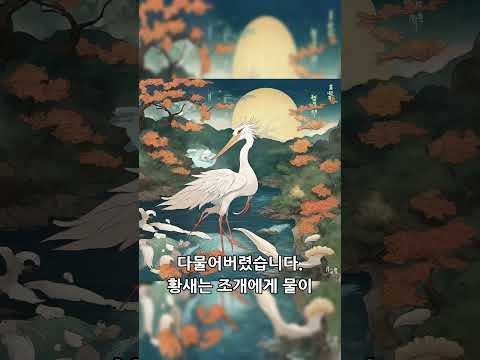

In [1]:
from IPython.display import YouTubeVideo

# Example video: 어부지리(漁夫之利)
YouTubeVideo('ly9RI1TmMJk', 450, 800)

## Setup

In [2]:
# clone github repository
!git clone https://github.com/yurangja99/HanjaShortsGenerator.git

Cloning into 'HanjaShortsGenerator'...
remote: Enumerating objects: 281, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 281 (delta 5), reused 14 (delta 4), pack-reused 262
Receiving objects: 100% (281/281), 62.39 MiB | 16.21 MiB/s, done.
Resolving deltas: 100% (150/150), done.


In [3]:
# move to the project root
%cd /content/HanjaShortsGenerator

/content/HanjaShortsGenerator


In [4]:
# install requirements
!pip install --upgrade --quiet torch
!pip install --upgrade --quiet accelerate
!pip install --upgrade --quiet selenium
!pip install --upgrade --quiet openai
!pip install --upgrade --quiet google
!pip install --upgrade --quiet google-cloud-texttospeech
!pip install --upgrade --quiet mutagen
!pip install --upgrade --quiet Pillow
!pip install --upgrade --quiet diffusers
!pip install --upgrade --quiet transformers
!pip install --upgrade --quiet moviepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.2/400.2 kB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.5 MB

## Setting Inputs

Before running cells below,
- log in to openai, and get API key
- log in to Pixabay, and get API key
- log in to Pexels, and get API key
- upload your google cloud platform json file.
- upload your korean ttf font file.

Each arguments are:
- keyword: keyword of the video (고사성어)
- start_from: defaults to "keyword".
- width: width of the video
- height: height of the video

In [15]:
# @title Setting API Keys
openai_api_key = "key" # @param {type:"string"}
pixabay_api_key = "key" # @param {type:"string"}
pexels_api_key = "key" # @param {type:"string"}
google_json_path = "gcp.json" # @param {type:"string"}
font_file_path = "font.ttf" # @param {type:"string"}

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = google_json_path

with open("keys.py", "w") as f:
  f.write("\n".join([
    f"openai_api_key = \"{openai_api_key}\"",
    f"pixabay_api_key = \"{pixabay_api_key}\"",
    f"pexels_api_key = \"{pexels_api_key}\""
  ]))

In [13]:
# @title Setting Arguments
keyword = "" # @param {type:"string"}
start_from = "keyword" # @param ["keyword", "data", "scripts", "scenes", "audios", "story", "clips"]
width = 1080 # @param {type:"slider", min:240, max:1080, step:10}
height = 1920 # @param {type:"slider", min:320, max:1920, step:10}

## Generate Video

In [16]:
# generate video with given inputs
!python main.py "$keyword" \
  --start-from "$start_from" \
  --width $width \
  --height $height \
  --font $font_file_path

2023-09-13 16:36:53.211958: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such 

## (Optional) Regenerate Image

If your generated image is not the one you wanted, you can regenerate an image with your own prompt and init image.

Set your own inputs, and run `regenerate.py`.

Example: scene of one seashell bite a stork's beak, at a river

|Input Image|Regenerated Image|
|-|-|
|![](https://github.com/yurangja99/HanjaShortsGenerator/raw/main/assets/regenerate0-0.png)|![](https://github.com/yurangja99/HanjaShortsGenerator/raw/main/assets/regenerate0-1.png)|

In [19]:
# @title Setting Regeneration Config
prompt = "prompt" # @param {type:"string"}
init_image = "init_image.png" # @param {type:"string"}
strength = 0.8 # @param {type:"slider", min:0, max:1, step:0.1}
num_output_imgs = 2 # @param {type:"slider", min:1, max:4, step:1}


In [20]:
# regenerate image
!python regenerate.py "$init_image" "$prompt" \
  --strength $strength \
  --num-imgs $num_output_imgs

2023-09-13 16:58:38.029860: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Fetching 13 files:   0% 0/13 [00:00<?, ?it/s]

Fetching 13 files:  15% 2/13 [00:01<00:08,  1.30it/s]















Fetching 13 files:  23% 3/13 [00:01<00:06,  1.57it/s]































































































































































































































































































































































































































Fetching 13 files:  31% 4/13 [00:35<01:54, 12.75s/it]













































































































































































































































